In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import random
import os
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

tf.__version__ 

'2.4.1'

Zacznijmy od prostej funkcji `f (x) = x ^ 2 + 1` i jej pochodnej `f'(x) = 2x`. Znalezienie minimum `f(x)` jest proste w tej sytuacji: minimalna wartość jest równa `1`, gdy `x == 0`. Zauważ, że nasza pochodna `f'(x)` równa się `0` dokładnie w tym punkcie (jeśli wartość pochodnej `f'(x) `jest równa `0` w punkcie `x == x0`, funkcja `f(x)` ma lokalne / globalne minimum / maksimum / punkt zwrotny w `x0`).

In [2]:
f = lambda x: x**2 + 1
grad_f = lambda x: 2*x

sample_data = pd.DataFrame({
    'x': np.arange(-2, 2, 0.05)
})
sample_data["y"] = f(sample_data.x)
sample_data["grad"] = grad_f(sample_data.x)

<AxesSubplot:xlabel='x'>

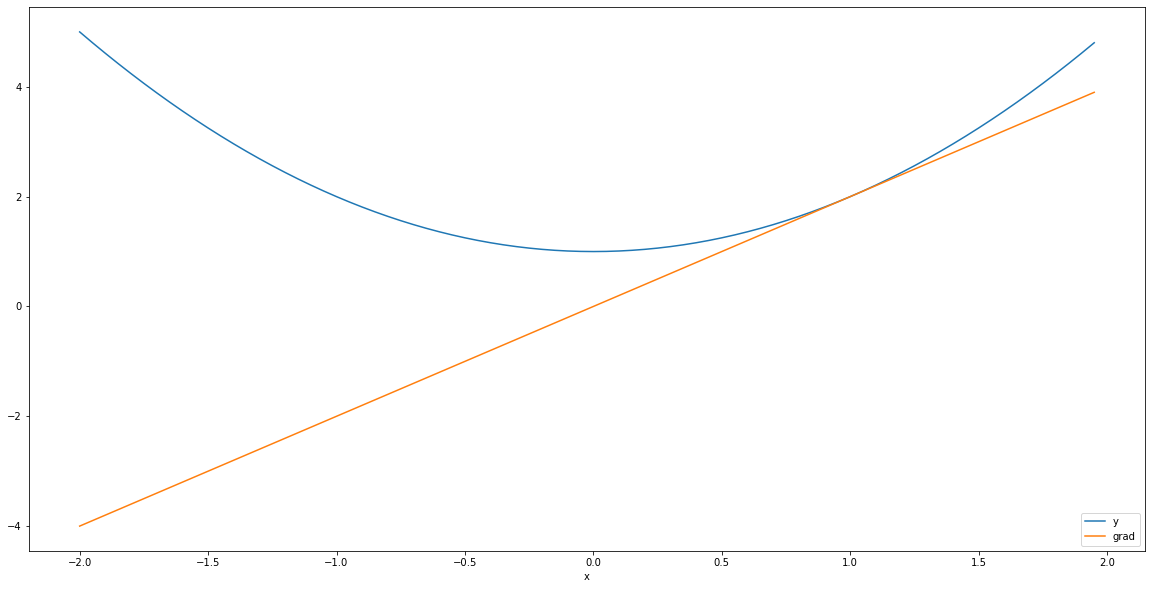

In [3]:
sample_data.plot(x = 'x')

Wniosek, jeśli nie możemy bezpośrednio znaleźć minimum funkcji `f(x)`, zawsze możemy spróbować sprawdzić, gdzie pochodna `f'(x)` jest równa `0` (a dla wielu rozwiązań sprawdź, która z nich jest minimum). To świetnie, ale co zrobić, gdy nie możemy rozwiązać równania `f'(x) == 0`? Żaden problem, zawsze możemy użyć bardzo prostego algorytmu o nazwie **Gradient Descent**:


1. Zacznij od wartości początkowej parametrów (x, y, beta, cokolwiek, ...)
2. Uaktualnij parametry formułą `param_new := param_old - LR * f'(param_old)` gdzie `LR` jest hiperparametrem zwanym **learning rate**. Wypróbujmy to dla naszej funkcji. Wypróbuj różne wartości learning rate, takie jak `0.1`, `0.01` i `1`

In [11]:
x0 = 1.345
lr = 0.1
epochs = 30 # Liczba epok, czyli liczba aktualizacji wag

def GD_ordinary_fun(f, grad_f, x0, lr, epochs):
    x = x0
    results = pd.DataFrame({
        'x': [x0],
        'y': [f(x0)],
        'grad': [grad_f(x0)]
    })
    for i in range(1, epochs + 1):
        x = x - lr * grad_f(x) # Gradient Descent
        print("Updated x value:", round(x, 8), ". Updated f(x) value:", round(f(x), 8))
        results = results.append(pd.DataFrame({
            'x': [x],
            'y': [f(x)],
            'grad': [grad_f(x)]
    }))
    return results

task1 = GD_ordinary_fun(f, grad_f, x0, lr, epochs)

Updated x value: 0.0936 . Updated f(x) value: 1.00876096
Updated x value: 0.073008 . Updated f(x) value: 1.00533017
Updated x value: 0.05694624 . Updated f(x) value: 1.00324287
Updated x value: 0.04441807 . Updated f(x) value: 1.00197296
Updated x value: 0.03464609 . Updated f(x) value: 1.00120035
Updated x value: 0.02702395 . Updated f(x) value: 1.00073029
Updated x value: 0.02107868 . Updated f(x) value: 1.00044431
Updated x value: 0.01644137 . Updated f(x) value: 1.00027032
Updated x value: 0.01282427 . Updated f(x) value: 1.00016446
Updated x value: 0.01000293 . Updated f(x) value: 1.00010006
Updated x value: 0.00780229 . Updated f(x) value: 1.00006088
Updated x value: 0.00608578 . Updated f(x) value: 1.00003704
Updated x value: 0.00474691 . Updated f(x) value: 1.00002253
Updated x value: 0.00370259 . Updated f(x) value: 1.00001371
Updated x value: 0.00288802 . Updated f(x) value: 1.00000834
Updated x value: 0.00225266 . Updated f(x) value: 1.00000507
Updated x value: 0.00175707 . 

<AxesSubplot:xlabel='x', ylabel='y'>

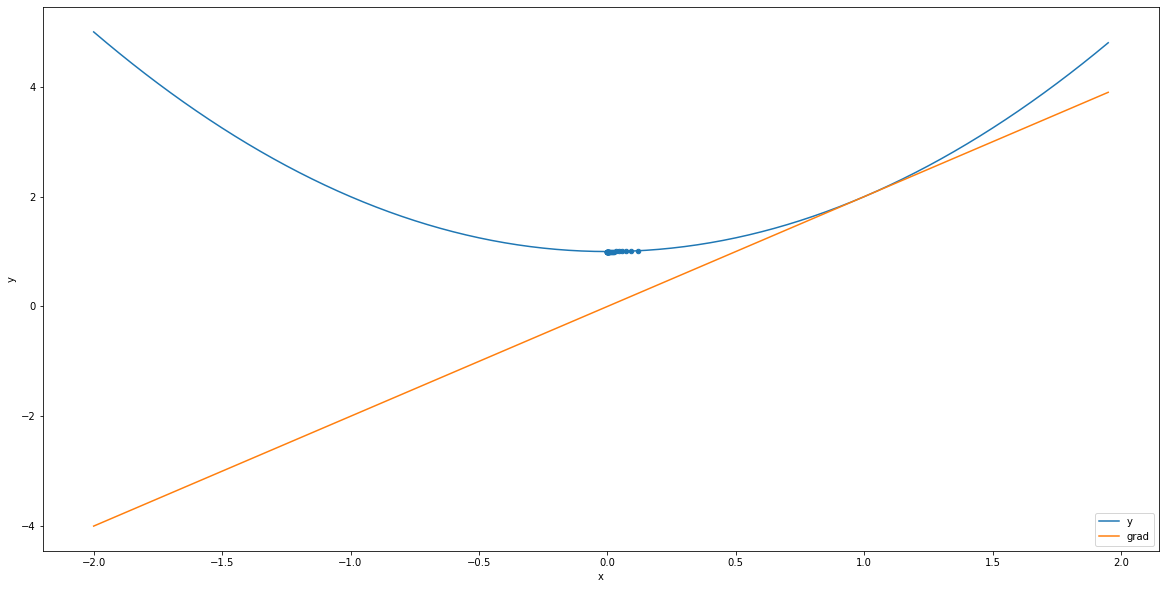

In [12]:
ax = sample_data.plot(x = 'x')
task1.plot(ax = ax, x = 'x', y = 'y', kind = 'scatter')

Jeśli teraz możemy zaimplementować Gradient Descent dla prostej funkcji z jednym parametrem, możemy spróbować rozwiązać podstawowy problem uczenia maszynowego - regresję liniową.

In [13]:
random.seed(10)
sample_data = pd.DataFrame({
    'x': np.random.uniform(-3, 3, 50)
})
sample_data["y"] = sample_data.x + np.random.normal(3, 1.2, 50)
sample_data["intercept"] = 1

<AxesSubplot:xlabel='x', ylabel='y'>

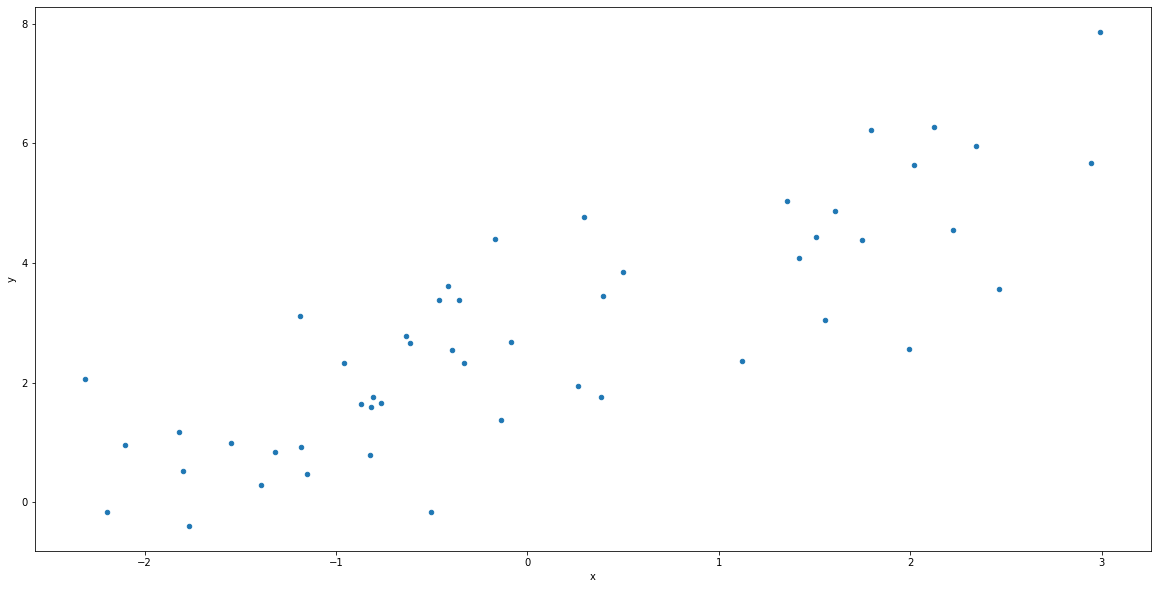

In [14]:
sample_data.plot(x = 'x', y = 'y', kind = 'scatter')

Naszym zadaniem jest znalezienie parametrów `b0` i `b1` modelu liniowego `y = b0 + b1*x` takich aby błąd średniokwadratowy (mean squared error) był minimalny. Zanim zaczniemy, sprawdźmy rozwiązanie z pythona:

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.array(sample_data["x"]).reshape(-1, 1)
y = np.array(sample_data["y"]).reshape(-1, 1)

reg = LinearRegression().fit(X, y)
print("b0", reg.intercept_)
print("b1", reg.coef_)
print("MSE:", mean_squared_error(y, reg.predict(X)))

b0 [2.74831322]
b1 [[1.07666974]]
MSE: 1.1518838420342734


In [16]:
X = np.concatenate((np.array(sample_data["intercept"]).reshape(-1, 1), X), axis=1)

Teraz musimy zaimplementować MSE:

In [18]:
def MSE(beta, X, y):
    betaX = np.matmul(beta, X.transpose())
    return np.mean((betaX - y[:,0])**2)

In [20]:
MSE(np.array([2.74831322, 1.07666974]), X, y)

1.1518838420342734

oraz pochodną MSE:

In [21]:
def MSE_grad(beta, X, y):
    betaX = np.matmul(beta, X.transpose())
    return 2*np.matmul(betaX - y[:,0], X)/y.shape[0]

Szczerze mówiąc, nie musimy tutaj używać Gradient Descent, równanie `MSE_grad == 0` ma rozwiązanie numeryczne:

In [22]:
np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y[:,0])

array([2.74831322, 1.07666974])

Ale powiedzmy, że naprawdę chcemy:

In [23]:
beta00 = np.array([5, -0.2])
lr = 0.1
epochs = 30 # Liczba epok, czyli liczba aktualizacji wag (po całym datasecie)

def GD_linear_regression(beta00, X, y, lr, epochs):
    beta = beta00
    results = pd.DataFrame({
        'b0': [beta00[0]],
        'b1': [beta00[1]],
        'mse': [MSE(beta00, X, y)],
        'epoch': [0]
    })
    for i in range(1, epochs + 1):
        beta = beta - lr * MSE_grad(beta, X, y) # Gradient Descent
        print("Updated b0 value:", round(beta[0], 8), ". Updated b1 value:", round(beta[1], 8), ". Updated MSE value:", round(MSE(beta, X, y), 8))
        results = results.append(pd.DataFrame({
            'b0': [beta[0]],
            'b1': [beta[1]],
            'mse': [MSE(beta, X, y)],
            'epoch': [i]
    }))
    return results

task2 = GD_linear_regression(beta00, X, y, lr, epochs)

Updated b0 value: 4.57084653 . Updated b1 value: 0.30710898 . Updated MSE value: 5.50363688
Updated b0 value: 4.21910925 . Updated b1 value: 0.60506818 . Updated MSE value: 3.67429079
Updated b0 value: 3.93277537 . Updated b1 value: 0.78179077 . Updated MSE value: 2.68229822
Updated b0 value: 3.70077589 . Updated b1 value: 0.88789625 . Updated MSE value: 2.10522328
Updated b0 value: 3.51341569 . Updated b1 value: 0.95259968 . Updated MSE value: 1.75433911
Updated b0 value: 3.3624539 . Updated b1 value: 0.9928174 . Updated MSE value: 1.53550094
Updated b0 value: 3.24101713 . Updated b1 value: 1.01838808 . Updated MSE value: 1.39711938
Updated b0 value: 3.14344342 . Updated b1 value: 1.03506844 . Updated MSE value: 1.30897462
Updated b0 value: 3.06510767 . Updated b1 value: 1.04625405 . Updated MSE value: 1.25261644
Updated b0 value: 3.00225347 . Updated b1 value: 1.05396907 . Updated MSE value: 1.21651183
Updated b0 value: 2.9518421 . Updated b1 value: 1.05943675 . Updated MSE value: 1.

<AxesSubplot:xlabel='x', ylabel='y'>

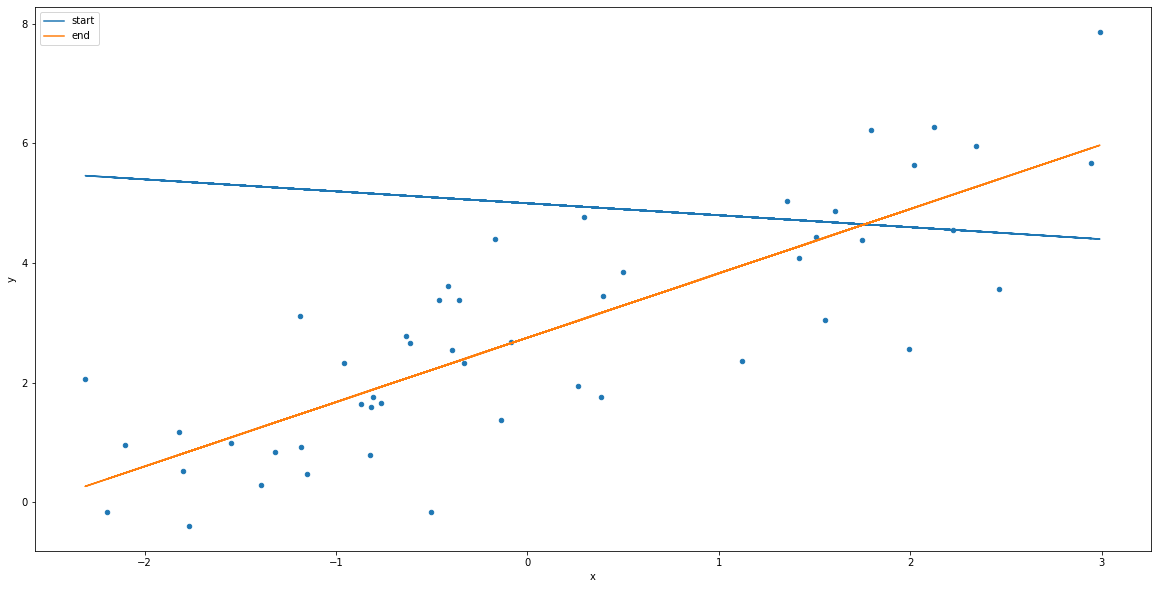

In [24]:
prediction = pd.DataFrame({
    'x': sample_data.x
})
prediction["start"] = [beta00[0] + beta00[1]*x for x in prediction.x]
prediction["end"] = [task2.b0.iloc[-1] + task2.b1.iloc[-1]*x for x in prediction.x]
ax = sample_data.plot(x = 'x', y = 'y', kind = 'scatter')
prediction.plot(ax = ax, x = 'x')

<AxesSubplot:xlabel='epoch'>

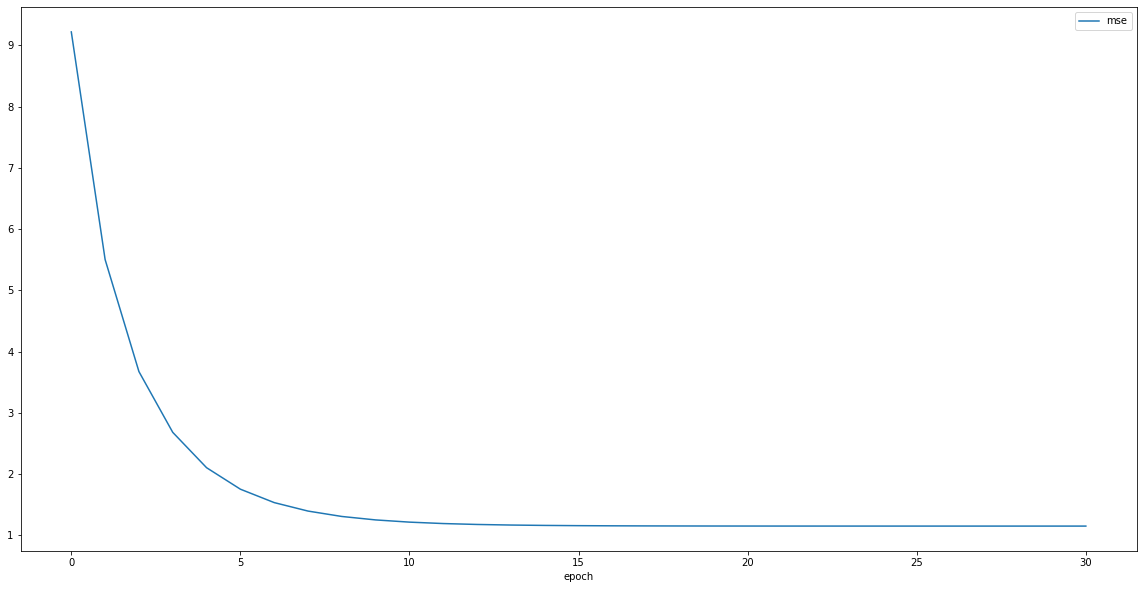

In [25]:
task2.plot(x = 'epoch', y = 'mse')

In [26]:
import itertools
beta_grid = list(itertools.product(np.arange(task2.b0.iloc[-1]-2, task2.b0.iloc[-1] +2, 0.1),
           np.arange(task2.b1.iloc[-1]-2, task2.b1.iloc[-1] +2, 0.1)))
beta_grid = pd.DataFrame({
    'b0': [x[0] for x in beta_grid],
    'b1': [x[1] for x in beta_grid]
})
beta_grid["mse"] = [MSE(np.array([b0, b1]), X, y) for b0, b1 in zip(beta_grid.b0, beta_grid.b1)]

<AxesSubplot:xlabel='b1', ylabel='b0'>

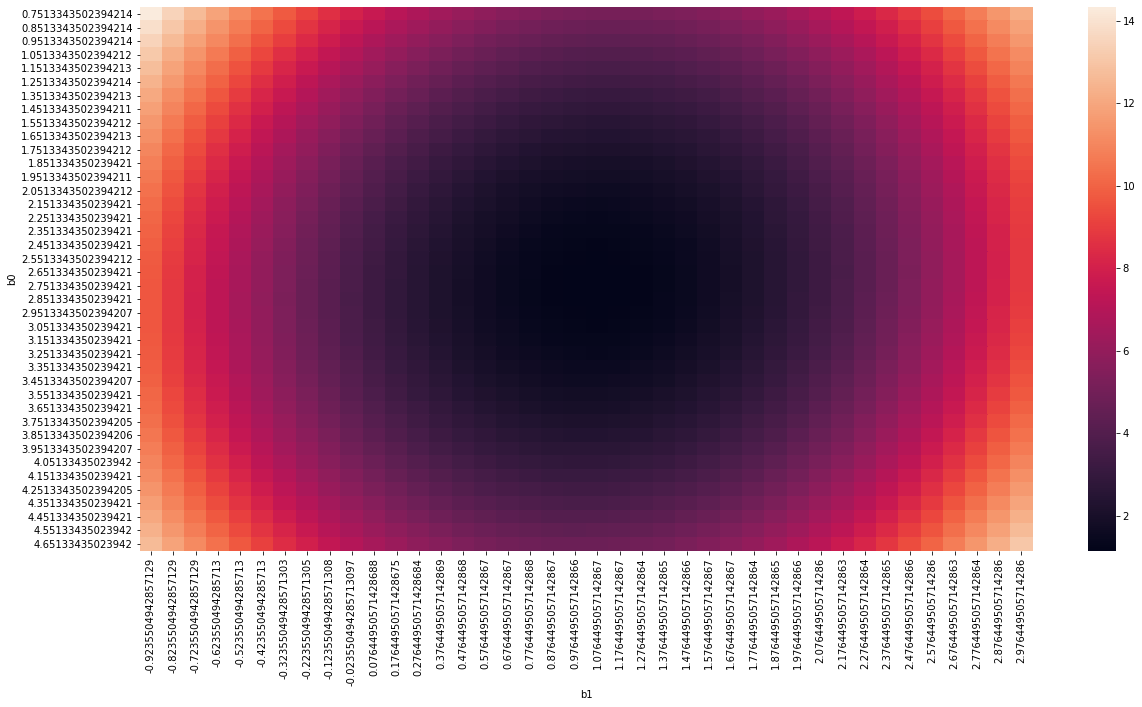

In [27]:
import seaborn as sns
sns.heatmap(beta_grid.pivot('b0', 'b1', 'mse'), square=False)

<AxesSubplot:xlabel='b1'>

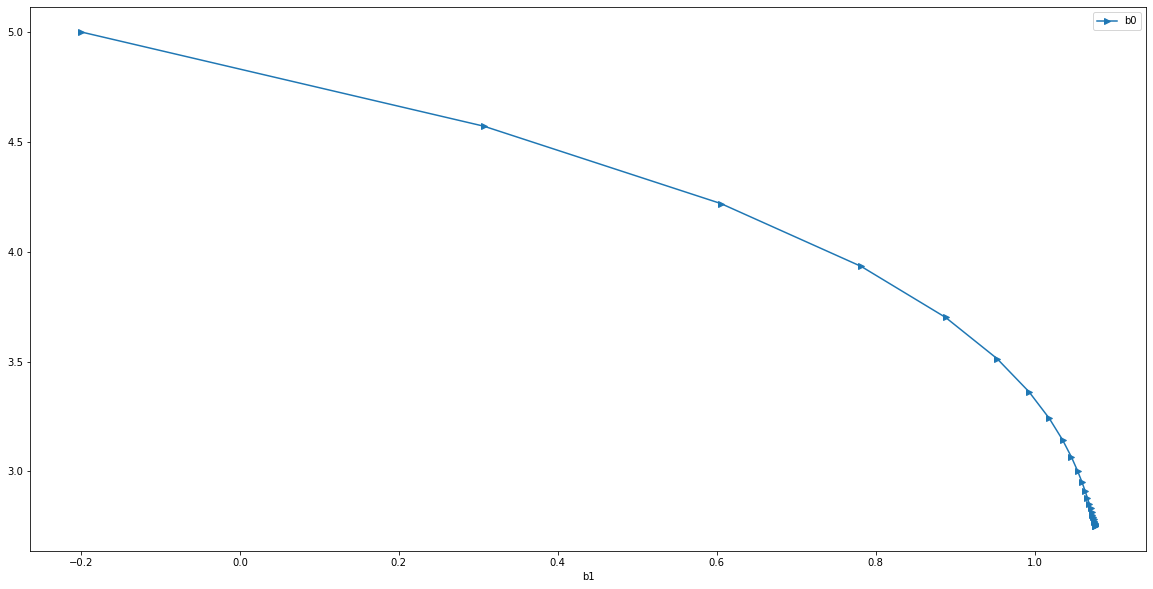

In [28]:
task2.plot(x = 'b1', y = 'b0', marker = ">")

Wiemy teraz, czym jest Gradient Descent i jak go używać do rozwiązywania problemów ML. W rzeczywistości często będziemy używać zaawansowanej wersji gradientu o nazwie **Stochastic Gradient Descent** lub **SGD** w skrócie. Wprowadzimy jedną małą zmianę w naszym algorytmie. Jak pamiętasz, nasz gradient MSE `MSE_grad` bierze pod uwagę macierz obliczeń `X` i vecotr `y` i mnoży je na różne sposoby. Załóżmy na chwilę, że mamy miliony obserwacji, te mnożenia mogą zająć dużo czasu i pamięci, może być nawet niemożliwe. Istnieje proste rozwiązanie tego problemu. Nasze dane możemy podzielić na tzw. **batche**. Jeśli mamy np. 50 obserwacji, możemy je podzielić na 5 batchy - po 10 obserwacji każda. Po tych 5 batchach SGD zobaczy wszystkie obserwacje, które mieliśmy - minie pierwsza **epoka** i proces rozpocznie się od początku. Można o tym myśleć jako o dodatkowej pętli nad partiami wewnątrz pętli epok z implementacji GD.

In [37]:
beta00 = np.array([5, -0.2])
lr = 0.1
epochs = 30 # Liczba epok, czyli liczba aktualizacji wag (po całym datasecie)
batch_size = 1 # Liczba podzbiorów w datasecie

def SGD_linear_regression(beta00, X, y, lr, epochs, batch_size):
    beta = beta00
    results = pd.DataFrame({
        'b0': [beta00[0]],
        'b1': [beta00[1]],
        'mse': [MSE(beta00, X, y)],
        'epoch': [0]
    })
    batches_per_epoch = int(np.ceil(y.shape[0] / batch_size))
    for i in range(1, epochs + 1):
        for b in range(1, batches_per_epoch + 1):
            X_b = X[((b - 1) * batch_size ):min((b * batch_size + 1), y.shape[0]), :]
            y_b = y[((b - 1) * batch_size ):min((b * batch_size + 1), y.shape[0]), :]
            beta = beta - lr * MSE_grad(beta, X_b, y_b) # Stochastic Gradient Descent
            print("Updated b0 value:", round(beta[0], 8), ". Updated b1 value:", round(beta[1], 8), ". Updated MSE value:", round(MSE(beta, X, y), 8))
            results = results.append(pd.DataFrame({
                'b0': [beta[0]],
                'b1': [beta[1]],
                'mse': [MSE(beta, X, y)],
                'epoch': [i + b / batches_per_epoch]
    }))
    return results

task3 = SGD_linear_regression(beta00, X, y, lr, epochs, batch_size)

Updated b0 value: 4.790488 . Updated b1 value: -0.24735989 . Updated MSE value: 8.61189609
Updated b0 value: 4.44888516 . Updated b1 value: -0.15822421 . Updated MSE value: 6.94718484
Updated b0 value: 4.46002735 . Updated b1 value: 0.39703804 . Updated MSE value: 4.87376502
Updated b0 value: 4.26840537 . Updated b1 value: 0.72190861 . Updated MSE value: 3.64145538
Updated b0 value: 3.8713532 . Updated b1 value: 1.03346593 . Updated MSE value: 2.40903199
Updated b0 value: 3.52923056 . Updated b1 value: 1.4345739 . Updated MSE value: 2.08124161
Updated b0 value: 3.32596658 . Updated b1 value: 1.44931332 . Updated MSE value: 1.81739583
Updated b0 value: 3.01067855 . Updated b1 value: 0.93038436 . Updated MSE value: 1.25998283
Updated b0 value: 2.89194644 . Updated b1 value: 0.69557422 . Updated MSE value: 1.47312663
Updated b0 value: 3.12041035 . Updated b1 value: 1.05632395 . Updated MSE value: 1.28996663
Updated b0 value: 3.2051858 . Updated b1 value: 1.27536342 . Updated MSE value: 1.

Updated b0 value: 2.70740493 . Updated b1 value: 1.47364512 . Updated MSE value: 1.48690478
Updated b0 value: 2.7769498 . Updated b1 value: 1.51965287 . Updated MSE value: 1.57325624
Updated b0 value: 2.80748786 . Updated b1 value: 1.35903319 . Updated MSE value: 1.32817151
Updated b0 value: 2.48378217 . Updated b1 value: 0.62940767 . Updated MSE value: 1.66806291
Updated b0 value: 2.36527527 . Updated b1 value: 0.4940823 . Updated MSE value: 2.05938017
Updated b0 value: 2.34639723 . Updated b1 value: 0.46479783 . Updated MSE value: 2.15256556
Updated b0 value: 2.42730628 . Updated b1 value: 0.40845092 . Updated MSE value: 2.24266874
Updated b0 value: 2.37525339 . Updated b1 value: 0.34827533 . Updated MSE value: 2.4675038
Updated b0 value: 2.064845 . Updated b1 value: 0.4379625 . Updated MSE value: 2.56134917
Updated b0 value: 1.66371901 . Updated b1 value: 0.63904736 . Updated MSE value: 2.81536733
Updated b0 value: 2.10270456 . Updated b1 value: 0.65078179 . Updated MSE value: 2.001

Updated b0 value: 2.60438777 . Updated b1 value: 0.58544849 . Updated MSE value: 1.69887154
Updated b0 value: 2.62680274 . Updated b1 value: 0.57136947 . Updated MSE value: 1.72129616
Updated b0 value: 2.87679861 . Updated b1 value: 1.76295987 . Updated MSE value: 2.18736678
Updated b0 value: 2.85827553 . Updated b1 value: 1.68320374 . Updated MSE value: 1.95951333
Updated b0 value: 3.00449064 . Updated b1 value: 1.63062899 . Updated MSE value: 1.89542644
Updated b0 value: 2.97725562 . Updated b1 value: 1.5972255 . Updated MSE value: 1.80190492
Updated b0 value: 2.77111892 . Updated b1 value: 1.50742388 . Updated MSE value: 1.549697
Updated b0 value: 2.68202099 . Updated b1 value: 1.52012532 . Updated MSE value: 1.57074099
Updated b0 value: 2.70143963 . Updated b1 value: 1.47185075 . Updated MSE value: 1.48401841
Updated b0 value: 2.70740493 . Updated b1 value: 1.47364512 . Updated MSE value: 1.48690478
Updated b0 value: 2.7769498 . Updated b1 value: 1.51965287 . Updated MSE value: 1.5

Updated b0 value: 2.77111892 . Updated b1 value: 1.50742388 . Updated MSE value: 1.549697
Updated b0 value: 2.68202099 . Updated b1 value: 1.52012532 . Updated MSE value: 1.57074099
Updated b0 value: 2.70143963 . Updated b1 value: 1.47185075 . Updated MSE value: 1.48401841
Updated b0 value: 2.70740493 . Updated b1 value: 1.47364512 . Updated MSE value: 1.48690478
Updated b0 value: 2.7769498 . Updated b1 value: 1.51965287 . Updated MSE value: 1.57325624
Updated b0 value: 2.80748786 . Updated b1 value: 1.35903319 . Updated MSE value: 1.32817151
Updated b0 value: 2.48378217 . Updated b1 value: 0.62940767 . Updated MSE value: 1.66806291
Updated b0 value: 2.36527527 . Updated b1 value: 0.4940823 . Updated MSE value: 2.05938017
Updated b0 value: 2.34639723 . Updated b1 value: 0.46479783 . Updated MSE value: 2.15256556
Updated b0 value: 2.42730628 . Updated b1 value: 0.40845092 . Updated MSE value: 2.24266874
Updated b0 value: 2.37525339 . Updated b1 value: 0.34827533 . Updated MSE value: 2.4

Updated b0 value: 2.68202099 . Updated b1 value: 1.52012532 . Updated MSE value: 1.57074099
Updated b0 value: 2.70143963 . Updated b1 value: 1.47185075 . Updated MSE value: 1.48401841
Updated b0 value: 2.70740493 . Updated b1 value: 1.47364512 . Updated MSE value: 1.48690478
Updated b0 value: 2.7769498 . Updated b1 value: 1.51965287 . Updated MSE value: 1.57325624
Updated b0 value: 2.80748786 . Updated b1 value: 1.35903319 . Updated MSE value: 1.32817151
Updated b0 value: 2.48378217 . Updated b1 value: 0.62940767 . Updated MSE value: 1.66806291
Updated b0 value: 2.36527527 . Updated b1 value: 0.4940823 . Updated MSE value: 2.05938017
Updated b0 value: 2.34639723 . Updated b1 value: 0.46479783 . Updated MSE value: 2.15256556
Updated b0 value: 2.42730628 . Updated b1 value: 0.40845092 . Updated MSE value: 2.24266874
Updated b0 value: 2.37525339 . Updated b1 value: 0.34827533 . Updated MSE value: 2.4675038
Updated b0 value: 2.064845 . Updated b1 value: 0.4379625 . Updated MSE value: 2.561

Updated b0 value: 2.12432341 . Updated b1 value: 0.51491956 . Updated MSE value: 2.27231402
Updated b0 value: 2.19287488 . Updated b1 value: 0.87461759 . Updated MSE value: 1.56607254
Updated b0 value: 2.30106552 . Updated b1 value: 0.97707807 . Updated MSE value: 1.38045537
Updated b0 value: 2.39997821 . Updated b1 value: 0.84822218 . Updated MSE value: 1.39771103
Updated b0 value: 2.60438777 . Updated b1 value: 0.58544849 . Updated MSE value: 1.69887154
Updated b0 value: 2.62680274 . Updated b1 value: 0.57136947 . Updated MSE value: 1.72129616
Updated b0 value: 2.87679861 . Updated b1 value: 1.76295987 . Updated MSE value: 2.18736678
Updated b0 value: 2.85827553 . Updated b1 value: 1.68320374 . Updated MSE value: 1.95951333
Updated b0 value: 3.00449064 . Updated b1 value: 1.63062899 . Updated MSE value: 1.89542644
Updated b0 value: 2.97725562 . Updated b1 value: 1.5972255 . Updated MSE value: 1.80190492
Updated b0 value: 2.77111892 . Updated b1 value: 1.50742388 . Updated MSE value: 

Updated b0 value: 2.98893897 . Updated b1 value: 0.54555563 . Updated MSE value: 1.79008776
Updated b0 value: 2.77011509 . Updated b1 value: 0.48368076 . Updated MSE value: 1.9000387
Updated b0 value: 2.53378997 . Updated b1 value: 0.67774396 . Updated MSE value: 1.55145647
Updated b0 value: 2.28250408 . Updated b1 value: 0.51159751 . Updated MSE value: 2.09342366
Updated b0 value: 2.12432341 . Updated b1 value: 0.51491956 . Updated MSE value: 2.27231402
Updated b0 value: 2.19287488 . Updated b1 value: 0.87461759 . Updated MSE value: 1.56607254
Updated b0 value: 2.30106552 . Updated b1 value: 0.97707807 . Updated MSE value: 1.38045537
Updated b0 value: 2.39997821 . Updated b1 value: 0.84822218 . Updated MSE value: 1.39771103
Updated b0 value: 2.60438777 . Updated b1 value: 0.58544849 . Updated MSE value: 1.69887154
Updated b0 value: 2.62680274 . Updated b1 value: 0.57136947 . Updated MSE value: 1.72129616
Updated b0 value: 2.87679861 . Updated b1 value: 1.76295987 . Updated MSE value: 

Updated b0 value: 3.36674509 . Updated b1 value: 0.79691481 . Updated MSE value: 1.67252104
Updated b0 value: 3.31704724 . Updated b1 value: 0.76339317 . Updated MSE value: 1.65505557
Updated b0 value: 3.35040789 . Updated b1 value: 1.13574576 . Updated MSE value: 1.52774588
Updated b0 value: 3.27008781 . Updated b1 value: 0.95239454 . Updated MSE value: 1.44630633
Updated b0 value: 2.98893897 . Updated b1 value: 0.54555563 . Updated MSE value: 1.79008776
Updated b0 value: 2.77011509 . Updated b1 value: 0.48368076 . Updated MSE value: 1.9000387
Updated b0 value: 2.53378997 . Updated b1 value: 0.67774396 . Updated MSE value: 1.55145647
Updated b0 value: 2.28250408 . Updated b1 value: 0.51159751 . Updated MSE value: 2.09342366
Updated b0 value: 2.12432341 . Updated b1 value: 0.51491956 . Updated MSE value: 2.27231402
Updated b0 value: 2.19287488 . Updated b1 value: 0.87461759 . Updated MSE value: 1.56607254
Updated b0 value: 2.30106552 . Updated b1 value: 0.97707807 . Updated MSE value: 

Updated b0 value: 3.05125965 . Updated b1 value: 1.31503564 . Updated MSE value: 1.37680135
Updated b0 value: 3.36674509 . Updated b1 value: 0.79691481 . Updated MSE value: 1.67252104
Updated b0 value: 3.31704724 . Updated b1 value: 0.76339317 . Updated MSE value: 1.65505557
Updated b0 value: 3.35040789 . Updated b1 value: 1.13574576 . Updated MSE value: 1.52774588
Updated b0 value: 3.27008781 . Updated b1 value: 0.95239454 . Updated MSE value: 1.44630633
Updated b0 value: 2.98893897 . Updated b1 value: 0.54555563 . Updated MSE value: 1.79008776
Updated b0 value: 2.77011509 . Updated b1 value: 0.48368076 . Updated MSE value: 1.9000387
Updated b0 value: 2.53378997 . Updated b1 value: 0.67774396 . Updated MSE value: 1.55145647
Updated b0 value: 2.28250408 . Updated b1 value: 0.51159751 . Updated MSE value: 2.09342366
Updated b0 value: 2.12432341 . Updated b1 value: 0.51491956 . Updated MSE value: 2.27231402
Updated b0 value: 2.19287488 . Updated b1 value: 0.87461759 . Updated MSE value: 

Updated b0 value: 2.62170854 . Updated b1 value: 1.47372999 . Updated MSE value: 1.49575709
Updated b0 value: 2.43854099 . Updated b1 value: 1.19076188 . Updated MSE value: 1.2697356
Updated b0 value: 2.40969272 . Updated b1 value: 0.93707369 . Updated MSE value: 1.31594524
Updated b0 value: 2.70604221 . Updated b1 value: 1.2678925 . Updated MSE value: 1.23030269
Updated b0 value: 2.83752234 . Updated b1 value: 1.48937242 . Updated MSE value: 1.52914721
Updated b0 value: 2.76942256 . Updated b1 value: 1.39211758 . Updated MSE value: 1.36562277
Updated b0 value: 2.8852175 . Updated b1 value: 1.37399085 . Updated MSE value: 1.36588366
Updated b0 value: 3.12854724 . Updated b1 value: 1.21721505 . Updated MSE value: 1.34745017
Updated b0 value: 3.09077625 . Updated b1 value: 1.22679952 . Updated MSE value: 1.32575775
Updated b0 value: 2.91645772 . Updated b1 value: 1.00627179 . Updated MSE value: 1.18876014
Updated b0 value: 2.97090346 . Updated b1 value: 1.0467541 . Updated MSE value: 1.2

Updated b0 value: 2.43854099 . Updated b1 value: 1.19076188 . Updated MSE value: 1.2697356
Updated b0 value: 2.40969272 . Updated b1 value: 0.93707369 . Updated MSE value: 1.31594524
Updated b0 value: 2.70604221 . Updated b1 value: 1.2678925 . Updated MSE value: 1.23030269
Updated b0 value: 2.83752234 . Updated b1 value: 1.48937242 . Updated MSE value: 1.52914721
Updated b0 value: 2.76942256 . Updated b1 value: 1.39211758 . Updated MSE value: 1.36562277
Updated b0 value: 2.8852175 . Updated b1 value: 1.37399085 . Updated MSE value: 1.36588366
Updated b0 value: 3.12854724 . Updated b1 value: 1.21721505 . Updated MSE value: 1.34745017
Updated b0 value: 3.09077625 . Updated b1 value: 1.22679952 . Updated MSE value: 1.32575775
Updated b0 value: 2.91645772 . Updated b1 value: 1.00627179 . Updated MSE value: 1.18876014
Updated b0 value: 2.97090346 . Updated b1 value: 1.0467541 . Updated MSE value: 1.20223371
Updated b0 value: 2.95204949 . Updated b1 value: 1.31712804 . Updated MSE value: 1.3

<AxesSubplot:xlabel='x', ylabel='y'>

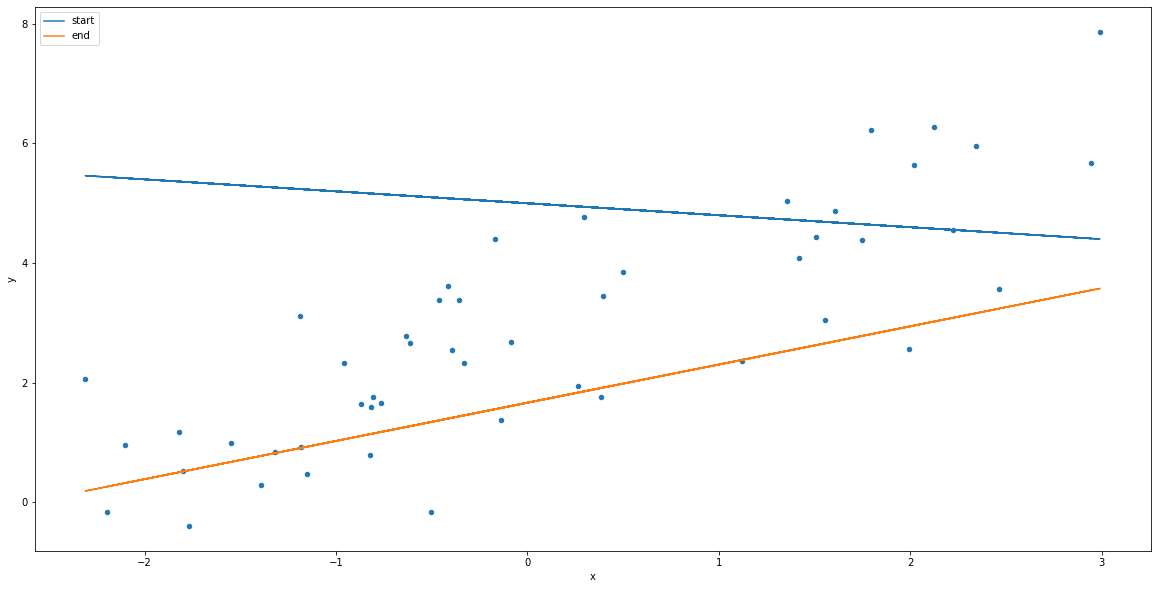

In [38]:
prediction = pd.DataFrame({
    'x': sample_data.x
})
prediction["start"] = [beta00[0] + beta00[1]*x for x in prediction.x]
prediction["end"] = [task3.b0.iloc[-1] + task3.b1.iloc[-1]*x for x in prediction.x]
ax = sample_data.plot(x = 'x', y = 'y', kind = 'scatter')
prediction.plot(ax = ax, x = 'x')

<AxesSubplot:xlabel='epoch'>

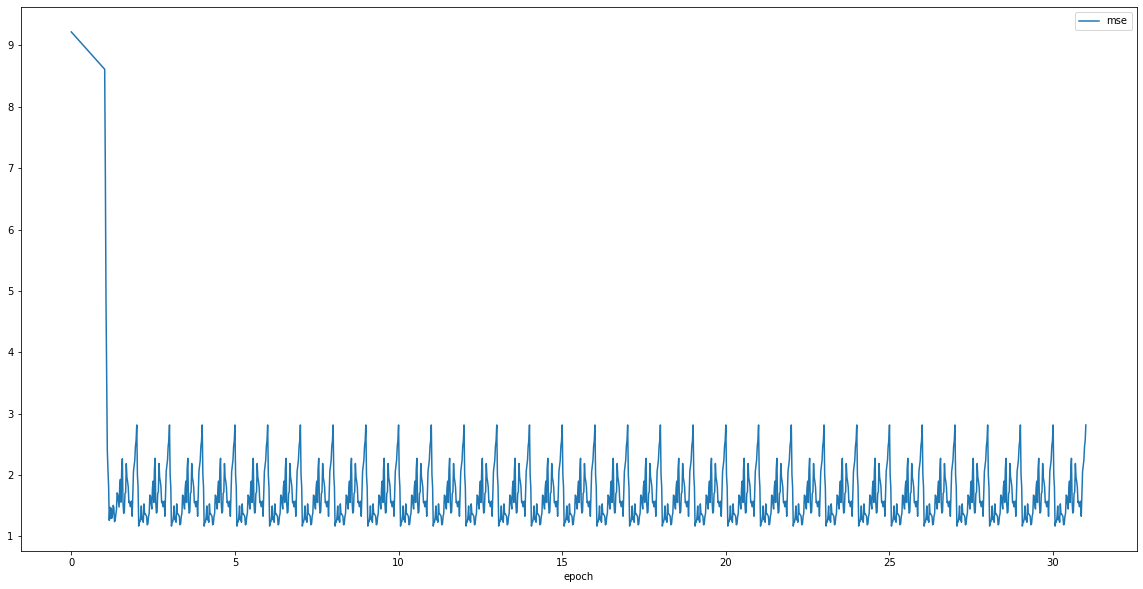

In [39]:
task3.plot(x = 'epoch', y = 'mse')

<AxesSubplot:xlabel='b1'>

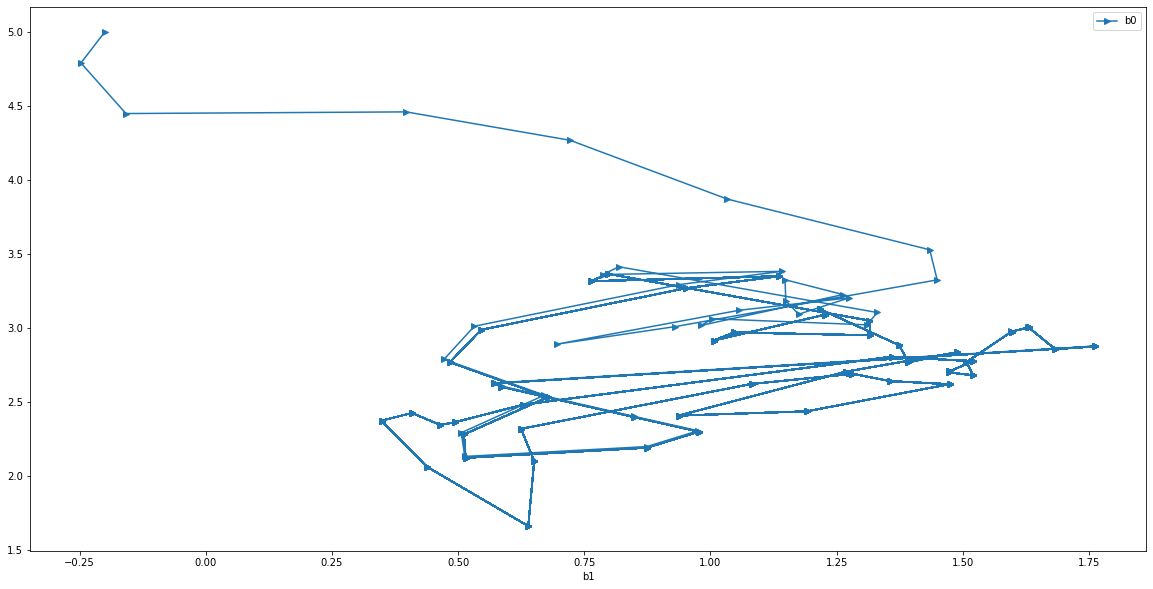

In [40]:
task3.plot(x = 'b1', y = 'b0', marker = ">")

W przypadku SGD obliczenia potrzebne do aktualizacji parametrów są szybsze niż w GD, ale SGD może potrzebować więcej kroków niż GD, aby zminimalizować funkcję. Jest jeszcze jedna ważna przewaga SGD nad GD - SGD może „wydostać się” z lokalnego minimum.

Kolejnym krokiem w zrozumieniu procesu optymalizacji będzie implementacja SGD dla regresji logistycznej. W przypadku regresji logistycznej nie ma rozwiązania nuerycznego, więc musimy użyć jakiegoś algorytmu

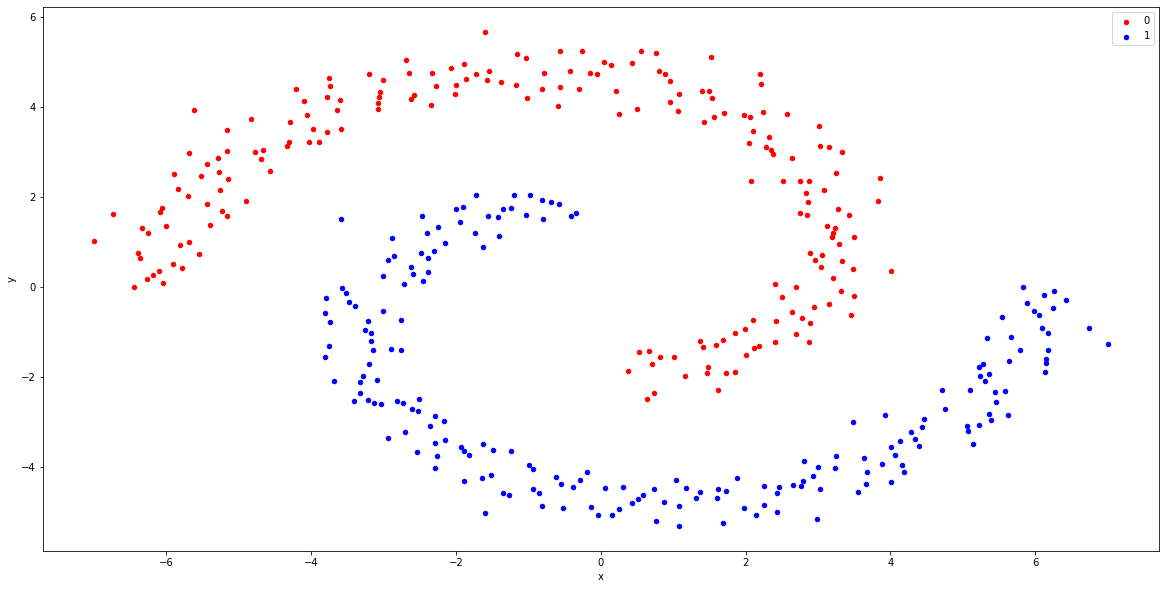

In [41]:
spirals = pd.read_csv("data/spirals.csv")
spirals["intercept"] = 1
fig, ax = plt.subplots()

colors = {0:'red', 1:'blue'}

grouped = spirals.groupby('class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.show()

Jak zawsze możemy sprawdzić rozwiązanie w Python. Python używa algorytmu scoringu Fishera lub algorytmu scoringu Newtona - algorytmy te wykorzystują nie tylko pierwszą, ale także drugą pochodną do aktualizacji parametrów. Korzystanie z drugiej pochodnej ma zalety, ale obliczenia są naprawdę czasochłonne i pochłaniają pamięć.

In [42]:
from sklearn.linear_model import LogisticRegression

X = np.array(spirals[["x", "y"]]).reshape(-1, 2)
y = np.array(spirals["class"]).reshape(-1, 1)

reg = LogisticRegression().fit(X, y)
print("b0", reg.intercept_)
print("b1 b2", reg.coef_)

b0 [0.00222788]
b1 b2 [[-0.04938149 -0.79891094]]


/home/maju116/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [43]:
X = np.concatenate((np.array(spirals["intercept"]).reshape(-1, 1), X), axis=1)

Następnym krokiem jest zaimplementowanie funkcji **sigmoid** używanej w regresji logistycznej:

In [44]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

i jej pochodnej:

In [45]:
sigmoid_grad = lambda x: sigmoid(x) * (1 - sigmoid(x))

W przypadku klasyfikacji binarnej naszą funkcją straty będzie **binary crossentropy**:

In [46]:
def binary_crossentropy(beta, X, y):
    z = sigmoid(np.matmul(beta, X.transpose()))
    return -np.mean(y * np.log(z) + (1 - y) * np.log(1 - z))

Potrzebujemy również gradientu. Tutaj zastosujemy tak zwaną **regułę łańcuchową** dla pochodnych:

In [47]:
def binary_crossentropy_grad(beta, X, y):
    z = sigmoid(np.matmul(beta, X.transpose()))
    dL = (-y[:,0] / z - (1 - y[:,0]) / (z - 1)) / y.shape[0]
    dV = sigmoid_grad(np.matmul(beta, X.transpose()))
    dx = X
    return np.matmul((dL * dV), dx)

Teraz mamy wszystko do zaimplementowania SGD do regresji logistycznej:

In [52]:
beta00 = np.array([0.3, 1, -0.2])
lr = 0.1
epochs = 50 # Liczba epok, czyli liczba aktualizacji wag (po całym datasecie)
batch_size = 20 # Liczba podzbiorów w datasecie

def SGD_logistic_regression(beta00, X, y, lr, epochs, batch_size):
    beta = beta00
    results = pd.DataFrame({
        'b0': [beta00[0]],
        'b1': [beta00[1]],
        'b2': [beta00[2]],
        'logloss': [binary_crossentropy(beta00, X, y)],
        'epoch': [0]
    })
    batches_per_epoch = int(np.ceil(y.shape[0] / batch_size))
    for i in range(1, epochs + 1):
        for b in range(1, batches_per_epoch + 1):
            X_b = X[((b - 1) * batch_size ):min((b * batch_size + 1), y.shape[0]), :]
            y_b = y[((b - 1) * batch_size ):min((b * batch_size + 1), y.shape[0]), :]
            beta = beta - lr * binary_crossentropy_grad(beta, X_b, y_b) # Stochastic Gradient Descent
            print("Updated b0 value:", round(beta[0], 8), ". Updated b1 value:", round(beta[1], 8), ". Updated b2 value:", round(beta[2], 8), ". Updated Logloss value:", round(binary_crossentropy(beta, X, y), 8))
            results = results.append(pd.DataFrame({
                'b0': [beta[0]],
                'b1': [beta[1]],
                'b2': [beta[2]],
                'logloss': [binary_crossentropy(beta, X, y)],
                'epoch': [i + b / batches_per_epoch]
    }))
    return results

task4 = SGD_logistic_regression(beta00, X, y, lr, epochs, batch_size)

Updated b0 value: 0.27584534 . Updated b1 value: 0.9033422 . Updated b2 value: -0.26342248 . Updated Logloss value: 1.60861038
Updated b0 value: 0.27388977 . Updated b1 value: 0.83076289 . Updated b2 value: -0.28511521 . Updated Logloss value: 1.53144124
Updated b0 value: 0.24033931 . Updated b1 value: 0.71630658 . Updated b2 value: -0.33209119 . Updated Logloss value: 1.42490122
Updated b0 value: 0.26165578 . Updated b1 value: 0.65332615 . Updated b2 value: -0.35492938 . Updated Logloss value: 1.3694067
Updated b0 value: 0.24835439 . Updated b1 value: 0.568897 . Updated b2 value: -0.40637745 . Updated Logloss value: 1.31690036
Updated b0 value: 0.25360511 . Updated b1 value: 0.45079714 . Updated b2 value: -0.45444028 . Updated Logloss value: 1.23723858
Updated b0 value: 0.24835084 . Updated b1 value: 0.40321553 . Updated b2 value: -0.48766997 . Updated Logloss value: 1.22252648
Updated b0 value: 0.25115505 . Updated b1 value: 0.3286399 . Updated b2 value: -0.50257869 . Updated Logloss

Updated b0 value: 0.06405154 . Updated b1 value: -0.04377931 . Updated b2 value: -0.80151313 . Updated Logloss value: 1.25811853
Updated b0 value: 0.06574447 . Updated b1 value: -0.06050473 . Updated b2 value: -0.78038662 . Updated Logloss value: 1.22885427
Updated b0 value: 0.05430011 . Updated b1 value: -0.06407491 . Updated b2 value: -0.77674323 . Updated Logloss value: 1.22361452
Updated b0 value: 0.05977681 . Updated b1 value: -0.05846241 . Updated b2 value: -0.78020255 . Updated Logloss value: 1.22925073
Updated b0 value: 0.06574455 . Updated b1 value: -0.04658076 . Updated b2 value: -0.78547122 . Updated Logloss value: 1.23909842
Updated b0 value: 0.06077517 . Updated b1 value: -0.04389329 . Updated b2 value: -0.80487074 . Updated Logloss value: 1.26185334
Updated b0 value: 0.06620787 . Updated b1 value: -0.05568338 . Updated b2 value: -0.79551053 . Updated Logloss value: 1.24732791
Updated b0 value: 0.06696747 . Updated b1 value: -0.00932859 . Updated b2 value: -0.80497687 . Up

Updated b0 value: 0.03638592 . Updated b1 value: -0.04799001 . Updated b2 value: -0.80253257 . Updated Logloss value: 1.25765334
Updated b0 value: 0.04005563 . Updated b1 value: -0.06801944 . Updated b2 value: -0.80259066 . Updated Logloss value: 1.25120476
Updated b0 value: 0.02806953 . Updated b1 value: -0.06027216 . Updated b2 value: -0.80653379 . Updated Logloss value: 1.25804141
Updated b0 value: 0.02573662 . Updated b1 value: -0.0424405 . Updated b2 value: -0.82006634 . Updated Logloss value: 1.27946271
Updated b0 value: 0.02074395 . Updated b1 value: -0.00302337 . Updated b2 value: -0.80522851 . Updated Logloss value: 1.27794321
Updated b0 value: 0.02114878 . Updated b1 value: 0.00737357 . Updated b2 value: -0.80116911 . Updated Logloss value: 1.27778549
Updated b0 value: 0.00315238 . Updated b1 value: -0.01198751 . Updated b2 value: -0.78832047 . Updated Logloss value: 1.25496558
Updated b0 value: 0.01390713 . Updated b1 value: 0.00460813 . Updated b2 value: -0.78193746 . Updat

Updated b0 value: 0.01488429 . Updated b1 value: -0.05876733 . Updated b2 value: -0.78088223 . Updated Logloss value: 1.22972459
Updated b0 value: 0.02146618 . Updated b1 value: -0.04642241 . Updated b2 value: -0.78590382 . Updated Logloss value: 1.23942295
Updated b0 value: 0.01690622 . Updated b1 value: -0.04361701 . Updated b2 value: -0.80520104 . Updated Logloss value: 1.26214018
Updated b0 value: 0.02291629 . Updated b1 value: -0.05532604 . Updated b2 value: -0.79572432 . Updated Logloss value: 1.24747119
Updated b0 value: 0.02416778 . Updated b1 value: -0.00885285 . Updated b2 value: -0.80526579 . Updated Logloss value: 1.27555496
Updated b0 value: 0.02057421 . Updated b1 value: -0.04818454 . Updated b2 value: -0.80242536 . Updated Logloss value: 1.2574174
Updated b0 value: 0.02442922 . Updated b1 value: -0.06837033 . Updated b2 value: -0.80241219 . Updated Logloss value: 1.25084148
Updated b0 value: 0.01262843 . Updated b1 value: -0.06064074 . Updated b2 value: -0.80646027 . Upd

Updated b0 value: -0.00531465 . Updated b1 value: 0.00478304 . Updated b2 value: -0.78202491 . Updated Logloss value: 1.25482273
Updated b0 value: -0.00073354 . Updated b1 value: 0.00208639 . Updated b2 value: -0.77907546 . Updated Logloss value: 1.25032118
Updated b0 value: 0.00570444 . Updated b1 value: -0.03091594 . Updated b2 value: -0.79338906 . Updated Logloss value: 1.25336591
Updated b0 value: 0.00486708 . Updated b1 value: -0.01741363 . Updated b2 value: -0.80181089 . Updated Logloss value: 1.26811676
Updated b0 value: 0.00354019 . Updated b1 value: -0.04326777 . Updated b2 value: -0.80044444 . Updated Logloss value: 1.25687042
Updated b0 value: 0.01086167 . Updated b1 value: -0.04509489 . Updated b2 value: -0.80227085 . Updated Logloss value: 1.2582983
Updated b0 value: 0.01312682 . Updated b1 value: -0.06092481 . Updated b2 value: -0.78120282 . Updated Logloss value: 1.22939922
Updated b0 value: 0.00226828 . Updated b1 value: -0.06480377 . Updated b2 value: -0.7776527 . Upda

Updated b0 value: 0.00752963 . Updated b1 value: -0.04516309 . Updated b2 value: -0.80227267 . Updated Logloss value: 1.25827387
Updated b0 value: 0.00983053 . Updated b1 value: -0.0609364 . Updated b2 value: -0.78121165 . Updated Logloss value: 1.2294018
Updated b0 value: -0.00099106 . Updated b1 value: -0.06483404 . Updated b2 value: -0.7776704 . Updated Logloss value: 1.22425142
Updated b0 value: 0.00504975 . Updated b1 value: -0.05877654 . Updated b2 value: -0.78088659 . Updated Logloss value: 1.22971749
Updated b0 value: 0.0117644 . Updated b1 value: -0.04633613 . Updated b2 value: -0.78586134 . Updated Logloss value: 1.23938847
Updated b0 value: 0.00729361 . Updated b1 value: -0.04350492 . Updated b2 value: -0.80514578 . Updated Logloss value: 1.26210628
Updated b0 value: 0.01342953 . Updated b1 value: -0.05519865 . Updated b2 value: -0.79564997 . Updated Logloss value: 1.24741181
Updated b0 value: 0.01478897 . Updated b1 value: -0.00870557 . Updated b2 value: -0.80521556 . Updat

Updated b0 value: -0.00952643 . Updated b1 value: 0.00482159 . Updated b2 value: -0.78205874 . Updated Logloss value: 1.25488259
Updated b0 value: -0.00489968 . Updated b1 value: 0.00216182 . Updated b2 value: -0.77908631 . Updated Logloss value: 1.25036819
Updated b0 value: 0.00159095 . Updated b1 value: -0.03087092 . Updated b2 value: -0.79340859 . Updated Logloss value: 1.25340413
Updated b0 value: 0.00079303 . Updated b1 value: -0.01736782 . Updated b2 value: -0.80182881 . Updated Logloss value: 1.2681552
Updated b0 value: -0.0004844 . Updated b1 value: -0.04328447 . Updated b2 value: -0.80047181 . Updated Logloss value: 1.25689582
Updated b0 value: 0.00686793 . Updated b1 value: -0.04517671 . Updated b2 value: -0.8022738 . Updated Logloss value: 1.25827001
Updated b0 value: 0.00917593 . Updated b1 value: -0.06093878 . Updated b2 value: -0.78121415 . Updated Logloss value: 1.22940327
Updated b0 value: -0.00163833 . Updated b1 value: -0.06484013 . Updated b2 value: -0.77767464 . Upd

Updated b0 value: 0.01092611 . Updated b1 value: -0.04632893 . Updated b2 value: -0.78585995 . Updated Logloss value: 1.23938847
Updated b0 value: 0.00646303 . Updated b1 value: -0.04349551 . Updated b2 value: -0.80514322 . Updated Logloss value: 1.26210627
Updated b0 value: 0.01260982 . Updated b1 value: -0.05518791 . Updated b2 value: -0.79564573 . Updated Logloss value: 1.24740954
Updated b0 value: 0.01397859 . Updated b1 value: -0.00869309 . Updated b2 value: -0.80521336 . Updated Logloss value: 1.27554216
Updated b0 value: 0.01052118 . Updated b1 value: -0.04830504 . Updated b2 value: -0.80237998 . Updated Logloss value: 1.25730926
Updated b0 value: 0.01449402 . Updated b1 value: -0.06859087 . Updated b2 value: -0.80232194 . Updated Logloss value: 1.25065232
Updated b0 value: 0.0028113 . Updated b1 value: -0.06087285 . Updated b2 value: -0.80643714 . Updated Logloss value: 1.25769964
Updated b0 value: 0.0007627 . Updated b1 value: -0.04293206 . Updated b2 value: -0.82014062 . Upda

Updated b0 value: -0.00083216 . Updated b1 value: -0.04328595 . Updated b2 value: -0.80047463 . Updated Logloss value: 1.25689859
Updated b0 value: 0.00652284 . Updated b1 value: -0.04518382 . Updated b2 value: -0.80227449 . Updated Logloss value: 1.25826813
Updated b0 value: 0.00883454 . Updated b1 value: -0.06094003 . Updated b2 value: -0.78121555 . Updated Logloss value: 1.22940417
Updated b0 value: -0.00197589 . Updated b1 value: -0.06484332 . Updated b2 value: -0.77767695 . Updated Logloss value: 1.2242563
Updated b0 value: 0.00407487 . Updated b1 value: -0.05877776 . Updated b2 value: -0.78088972 . Updated Logloss value: 1.22972033
Updated b0 value: 0.01080269 . Updated b1 value: -0.04632787 . Updated b2 value: -0.78585978 . Updated Logloss value: 1.23938852
Updated b0 value: 0.00634074 . Updated b1 value: -0.04349412 . Updated b2 value: -0.80514288 . Updated Logloss value: 1.26210631
Updated b0 value: 0.01248914 . Updated b1 value: -0.05518633 . Updated b2 value: -0.79564514 . U

Updated b0 value: 0.00061196 . Updated b1 value: -0.04293505 . Updated b2 value: -0.82014169 . Updated Logloss value: 1.27933979
Updated b0 value: -0.00402622 . Updated b1 value: -0.00255432 . Updated b2 value: -0.80546038 . Updated Logloss value: 1.27839097
Updated b0 value: -0.00330729 . Updated b1 value: 0.00794665 . Updated b2 value: -0.8013616 . Updated Logloss value: 1.27824088
Updated b0 value: -0.02100813 . Updated b1 value: -0.01128287 . Updated b2 value: -0.78843492 . Updated Logloss value: 1.25541185
Updated b0 value: -0.00994394 . Updated b1 value: 0.00482536 . Updated b2 value: -0.78206267 . Updated Logloss value: 1.25488927
Updated b0 value: -0.00531266 . Updated b1 value: 0.00216925 . Updated b2 value: -0.77908795 . Updated Logloss value: 1.25037357
Updated b0 value: 0.00118319 . Updated b1 value: -0.0308665 . Updated b2 value: -0.79341107 . Updated Logloss value: 1.25340863
Updated b0 value: 0.00038917 . Updated b1 value: -0.01736333 . Updated b2 value: -0.80183111 . Up

Updated b0 value: -0.00090006 . Updated b1 value: -0.04328624 . Updated b2 value: -0.80047518 . Updated Logloss value: 1.25689915
Updated b0 value: 0.00645545 . Updated b1 value: -0.0451852 . Updated b2 value: -0.80227463 . Updated Logloss value: 1.25826778
Updated b0 value: 0.00876788 . Updated b1 value: -0.06094027 . Updated b2 value: -0.78121583 . Updated Logloss value: 1.22940435
Updated b0 value: -0.0020418 . Updated b1 value: -0.06484395 . Updated b2 value: -0.7776774 . Updated Logloss value: 1.22425665
Updated b0 value: 0.00400962 . Updated b1 value: -0.05877785 . Updated b2 value: -0.78088995 . Updated Logloss value: 1.22972054
Updated b0 value: 0.01073832 . Updated b1 value: -0.04632732 . Updated b2 value: -0.78585969 . Updated Logloss value: 1.23938855
Updated b0 value: 0.00627697 . Updated b1 value: -0.0434934 . Updated b2 value: -0.8051427 . Updated Logloss value: 1.26210634
Updated b0 value: 0.0124262 . Updated b1 value: -0.05518551 . Updated b2 value: -0.79564483 . Update

Updated b0 value: 0.01378945 . Updated b1 value: -0.00869019 . Updated b2 value: -0.8052129 . Updated Logloss value: 1.27554259
Updated b0 value: 0.01033457 . Updated b1 value: -0.04830733 . Updated b2 value: -0.80237965 . Updated Logloss value: 1.25730792
Updated b0 value: 0.0143096 . Updated b1 value: -0.06859502 . Updated b2 value: -0.80232077 . Updated Logloss value: 1.25064947
Updated b0 value: 0.00262907 . Updated b1 value: -0.06087721 . Updated b2 value: -0.8064372 . Updated Logloss value: 1.25769829
Updated b0 value: 0.00058252 . Updated b1 value: -0.04293563 . Updated b2 value: -0.82014191 . Updated Logloss value: 1.27933982
Updated b0 value: -0.00405524 . Updated b1 value: -0.00255378 . Updated b2 value: -0.80546078 . Updated Logloss value: 1.27839168
Updated b0 value: -0.00333595 . Updated b1 value: 0.00794732 . Updated b2 value: -0.80136195 . Updated Logloss value: 1.27824159
Updated b0 value: -0.02103644 . Updated b1 value: -0.01128205 . Updated b2 value: -0.78843518 . Upd

Updated b0 value: 0.00115256 . Updated b1 value: -0.03086617 . Updated b2 value: -0.79341126 . Updated Logloss value: 1.25340897
Updated b0 value: 0.00035884 . Updated b1 value: -0.01736299 . Updated b2 value: -0.80183129 . Updated Logloss value: 1.26816005
Updated b0 value: -0.00091332 . Updated b1 value: -0.0432863 . Updated b2 value: -0.80047529 . Updated Logloss value: 1.25689925
Updated b0 value: 0.0064423 . Updated b1 value: -0.04518548 . Updated b2 value: -0.80227466 . Updated Logloss value: 1.25826771
Updated b0 value: 0.00875486 . Updated b1 value: -0.06094032 . Updated b2 value: -0.78121589 . Updated Logloss value: 1.22940439
Updated b0 value: -0.00205467 . Updated b1 value: -0.06484407 . Updated b2 value: -0.77767749 . Updated Logloss value: 1.22425672
Updated b0 value: 0.00399688 . Updated b1 value: -0.05877786 . Updated b2 value: -0.78088999 . Updated Logloss value: 1.22972059
Updated b0 value: 0.01072576 . Updated b1 value: -0.04632722 . Updated b2 value: -0.78585968 . Up

<AxesSubplot:xlabel='epoch'>

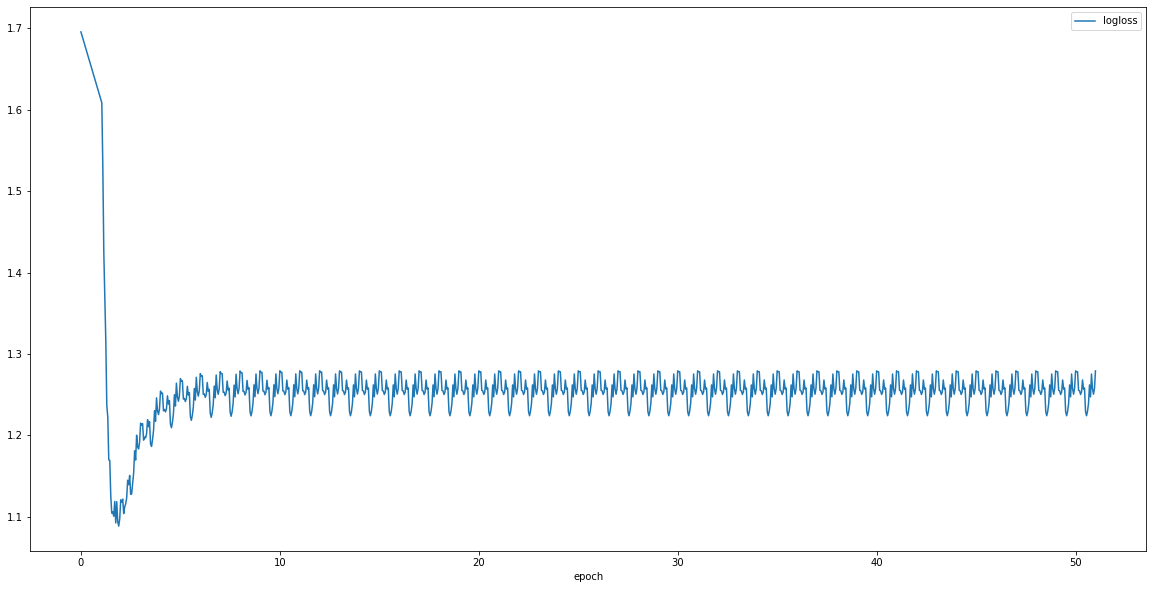

In [53]:
task4.plot(x = 'epoch', y = 'logloss')

In [54]:
xy_grid = list(itertools.product(np.arange(spirals.x.min(), spirals.x.max(), 0.1),
           np.arange(spirals.y.min(), spirals.y.max(), 0.1)))
xy_grid = pd.DataFrame({
    'x': [z[0] for z in xy_grid],
    'y': [z[1] for z in xy_grid]
})
xy_grid["class"] = [task4.b0.iloc[-1] + task4.b1.iloc[-1]*x + task4.b2.iloc[-1]*y for x, y in zip(xy_grid.x, xy_grid.y)]
xy_grid["class"] = sigmoid(xy_grid["class"]) > 0.5
xy_grid["class"] = xy_grid["class"].astype(int)

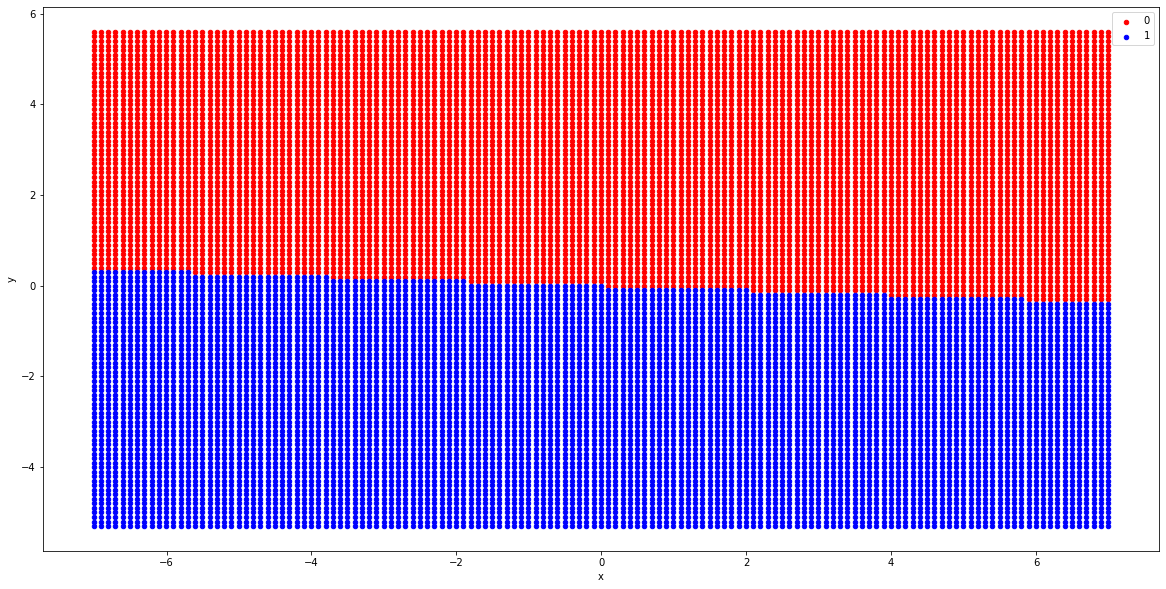

In [55]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'blue'}

grouped = xy_grid.groupby('class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.show()